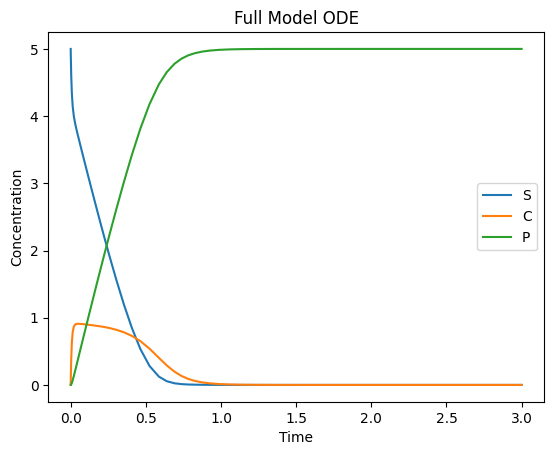

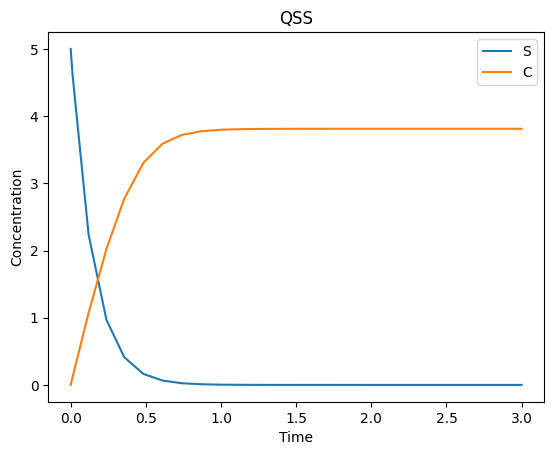

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

#this code can be resued for basically everything

# dydt is written as a function (like ode45 in MATLAB)
def full_model_ODE(t, y):
    #takes in the species

    s0,C,p0 = y # unpack y

    # parameters
    k1 = 30
    kn1 = 1
    k2 = 10
    eT = 1

    # differential equations
    #there's a video on how to write these down from a reaction network
    dSdt = -k1 * s0 * (eT - C) + kn1 * C
    dCdt = -kn1 * C + k1 * s0 * (eT - C) - k2 * C
    dPdt = k2 * C

    #outputs the deriviates for each of the species
    dydt = [dSdt, dCdt, dPdt] # repack dydt
    # the Y var needs to be the same size as the dydt!

    return dydt




# the time interval of the simulation
tspan = [0,3]

# set initial conditions
y0 = [5,0,0] # S C P

# integrate the ODE
sol = solve_ivp(full_model_ODE, tspan, y0)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['S', 'C', 'P'])
plt.title('Full Model ODE')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()


def QSS_aprox_ODE(t, y):
    #takes in the species

    s0,p = y # unpack y

    # parameters
    k1 = 30
    kn1 = 1
    k2 = 10
    eT = 1

    # differential equations
    #there's a video on how to write these down from a reaction network
    dSdt = -(k1*k2*eT*s0)/(kn1+k2+k1+s0)
    dPdt = (k1 * k2 * eT * s0) / (kn1 + k2 + k1 * s0)

    #outputs the deriviates for each of the species
    dydt = [dSdt, dPdt] # repack dydt

    return dydt

# the time interval of the simulation
tspan = [0,3]

# set initial conditions
y0 = [5,0] # S C P

# integrate the ODE
sol = solve_ivp(QSS_aprox_ODE, tspan, y0)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['S', 'C', 'P'])
plt.title('QSS')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()
